<a href="https://colab.research.google.com/github/JackMyles/CS156a-LearningFromData/blob/main/cs156a_hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 156a HW 7

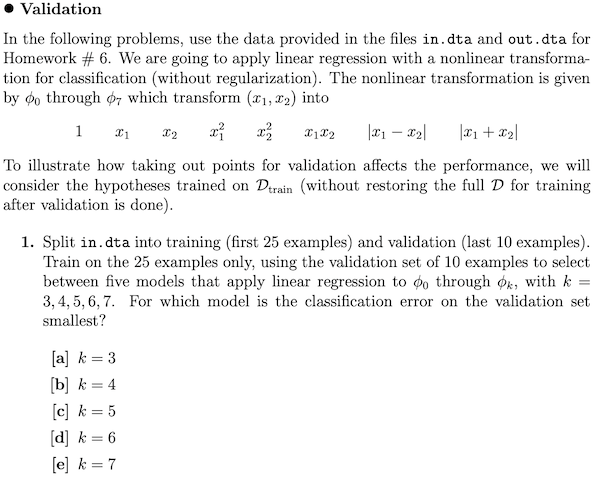

#### Answer:
D

In [32]:
import numpy as np

train = np.loadtxt('in.dta.txt')

N_train = 25
x_train = train[:N_train, :2]
y_train = train[:N_train, 2]

N_val = 10
x_val = train[-N_val:, :2]
y_val = train[-N_val:, 2]

def get_Z(X, k):
    x1, x2 = X
    return np.array([1, x1, x2, x1**2, x2**2, x1*x2, np.abs(x1-x2), np.abs(x1+x2)])[:k+1]

for k in range(3, 8):
    Z_train = np.apply_along_axis(get_Z, 1, x_train, k)
    Z_val = np.apply_along_axis(get_Z, 1, x_val, k)

    X_dagger = np.dot(np.linalg.inv(np.dot(Z_train.T, Z_train)), Z_train.T)
    w = np.dot(X_dagger, y_train)

    E_VAL = sum(y_val != np.sign(np.dot(Z_val, w))) / N_val

    print(f"E_VAL for k={k}: {E_VAL}")

E_VAL for k=3: 0.3
E_VAL for k=4: 0.5
E_VAL for k=5: 0.2
E_VAL for k=6: 0.0
E_VAL for k=7: 0.1


k=6 has the lowest classification error on the validation set

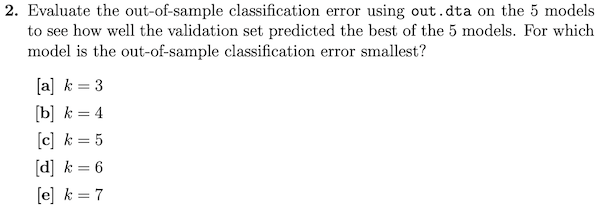

#### Answer:
E

In [33]:
test = np.loadtxt('out.dta.txt')

x_test = test[:, :2]
y_test = test[:, 2]
N_test = test.shape[0]

for k in range(3, 8):
    Z_train = np.apply_along_axis(get_Z, 1, x_train, k)
    Z_test = np.apply_along_axis(get_Z, 1, x_test, k)

    X_dagger = np.dot(np.linalg.inv(np.dot(Z_train.T, Z_train)), Z_train.T)
    w = np.dot(X_dagger, y_train)

    E_OUT = sum(y_test != np.sign(np.dot(Z_test, w))) / N_test

    print(f"E_OUT for k={k} is {E_OUT}")

E_OUT for k=3 is 0.42
E_OUT for k=4 is 0.416
E_OUT for k=5 is 0.188
E_OUT for k=6 is 0.084
E_OUT for k=7 is 0.072


k=7 has the lowest out-of-sample classification error

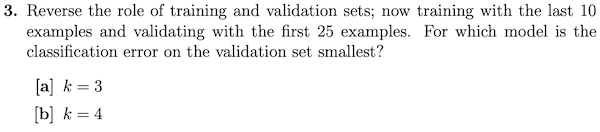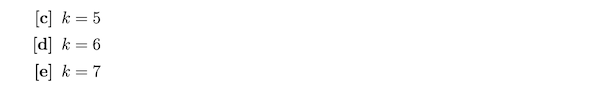

#### Answer:
D

In [34]:
N_train = 10
x_train = train[-N_train:, :2]
y_train = train[-N_train:, 2]

N_val = 25
x_val = train[:N_val, :2]
y_val = train[:N_val, 2]

for k in range(3, 8):
    Z_train = np.apply_along_axis(get_Z, 1, x_train, k)
    Z_val = np.apply_along_axis(get_Z, 1, x_val, k)

    X_dagger = np.dot(np.linalg.inv(np.dot(Z_train.T, Z_train)), Z_train.T)
    w = np.dot(X_dagger, y_train)

    E_VAL = sum(y_val != np.sign(np.dot(Z_val, w))) / N_val

    print(f"E_VAL for k={k}: {E_VAL}")

E_VAL for k=3: 0.28
E_VAL for k=4: 0.36
E_VAL for k=5: 0.2
E_VAL for k=6: 0.08
E_VAL for k=7: 0.12


k=6 has the lowest classification error on the validation set

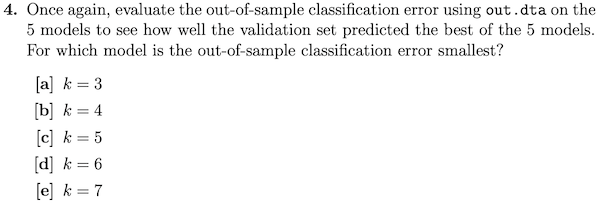

#### Answer:
D

In [35]:
x_test = test[:, :2]
y_test = test[:, 2]
N_test = test.shape[0]

for k in range(3, 8):
    Z_train = np.apply_along_axis(get_Z, 1, x_train, k)
    Z_test = np.apply_along_axis(get_Z, 1, x_test, k)

    X_dagger = np.dot(np.linalg.inv(np.dot(Z_train.T, Z_train)), Z_train.T)
    w = np.dot(X_dagger, y_train)

    E_OUT = sum(y_test != np.sign(np.dot(Z_test, w))) / N_test

    print(f"E_OUT for k={k} is {E_OUT}")

E_OUT for k=3 is 0.396
E_OUT for k=4 is 0.388
E_OUT for k=5 is 0.284
E_OUT for k=6 is 0.192
E_OUT for k=7 is 0.196


k=6 has the lowest out-of-sample classification error

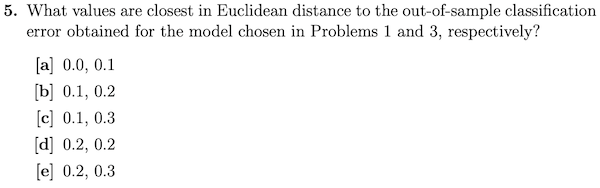

#### Answer:
B

In the model chosen in Problem 1, E_OUT=0.084 ~ 0.1

In the model chosen in Probelm 3, E_OUT=0.192 ~ 0.2

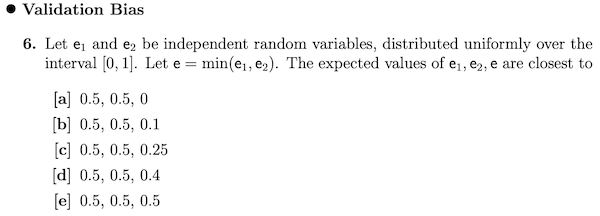

#### Answer:
D

In [36]:
N = 1000000

e1 = np.random.uniform(0, 1, N)
e2 = np.random.uniform(0, 1, N)
e = np.minimum(e1, e2)

print(f"e1: ", "%.2f" % np.mean(e1))
print(f"e2: ", "%.2f" % np.mean(e2))
print(f"e: ", "%.2f" % np.mean(e))

e1:  0.50
e2:  0.50
e:  0.33


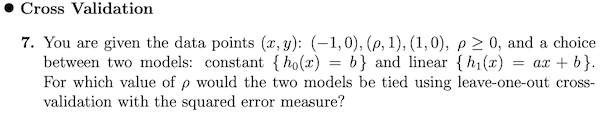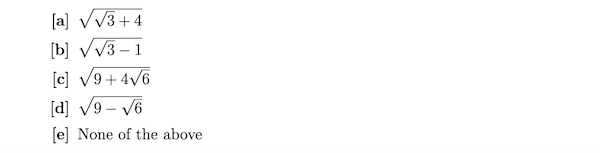

#### Answer:
C

In [37]:
answers = {
    "a": np.sqrt(np.sqrt(3) + 4),
    "b": np.sqrt(np.sqrt(3) - 1),
    "c": np.sqrt(9 + 4 * np.sqrt(6)),
    "d": np.sqrt(9 - np.sqrt(6))
}

# Check all 4 answers [a], [b], [c] and [d]
for choice, p in answers.items():
    x = np.array([-1, p, 1])
    y = np.array([0, 1, 0])
    N = x.shape[0]

    # Leave-one-out X-Validation
    E_VALS_CON = []
    E_VALS_LIN = []
    for i in range(N):
        x_train = np.delete(x, i)
        y_train = np.delete(y, i)

        x_val = x[i]
        y_val = y[i]

        # Constant Model
        b = np.mean(y_train)
        E_VALS_CON.append((y_val - b) ** 2)

        # Linear Model
        x_train = np.column_stack((np.ones(x_train.shape), x_train))
        x_val = np.array([1, x_val])
        X_dagger = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)), x_train.T)
        w = np.dot(X_dagger, y_train)
        E_VALS_LIN.append((y_val - np.dot(x_val, w)) ** 2)

    print(f"[{choice}]")
    print(f"Constant model: {sum(E_VALS_CON) / N}")
    print(f"Linear model: {sum(E_VALS_LIN) / N}\n")

[a]
Constant model: 0.5
Linear model: 1.1350433676859402

[b]
Constant model: 0.5
Linear model: 64.66494840795316

[c]
Constant model: 0.5
Linear model: 0.5

[d]
Constant model: 0.5
Linear model: 0.9868839293305474



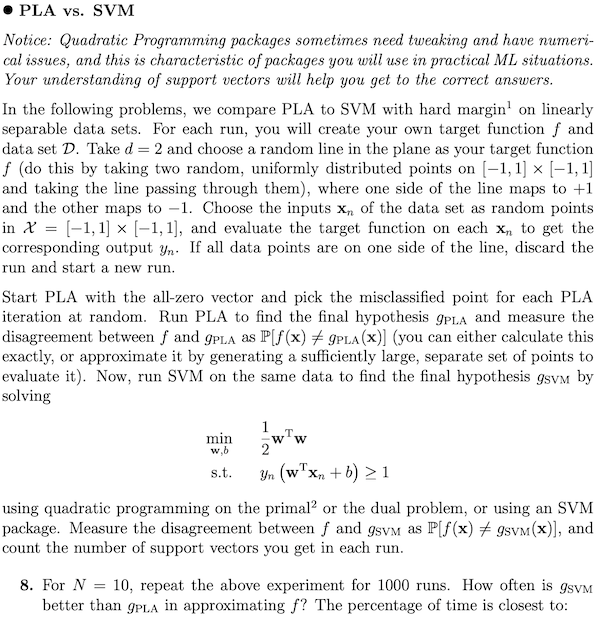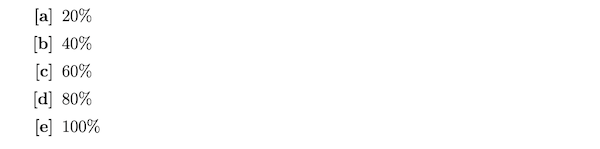

#### Answer:
C

In [38]:
from sklearn.linear_model import Perceptron
from sklearn import svm, model_selection

RUNS = 1000
N = 10

def get_y(X, m, b):
    y = []
    for p in X:
        if p[2] >= (m * p[1] + b):
            y.append(1)
        else:
            y.append(-1)
    return y

def generate_data(N):
    p1 = np.random.uniform(-1, 1, 2)
    p2 = np.random.uniform(-1, 1, 2)
    m = (p2[1] - p1[1])/(p2[0] - p1[0])
    b = p1[1] - m * p1[0]

    X = np.insert(np.random.uniform(-1, 1, (N, 2)), 0, 1, axis=1)
    y = get_y(X, m, b)
    while len(set(y)) == 1:
        X = np.insert(np.random.uniform(-1, 1, (N, 2)), 0, 1, axis=1)
        y = get_y(X, m, b)

    X_test = np.insert(np.random.uniform(-1, 1, (3 * N, 2)), 0, 1, axis=1)
    y_test = get_y(X_test, m, b)

    return (X, y, X_test, y_test)

def perceptron(N):
    X, y, X_test, y_test = generate_data(N)
    clf = Perceptron()
    clf.fit(X, y)
    return clf.score(X_test, y_test)

def SVM(N):
    X, y, X_test, y_test = generate_data(N)
    clf = svm.SVC(kernel='linear', C=1000000000)
    clf.fit(X, y)
    return clf.score(X_test, y_test)

svm_outperforms = 0
for _ in range(RUNS):
    if SVM(N) > perceptron(N):
        svm_outperforms += 1
print(f"% SVM outperforms PLA: {svm_outperforms / RUNS * 100}%")

% SVM outperforms PLA: 52.1%


~ 60%

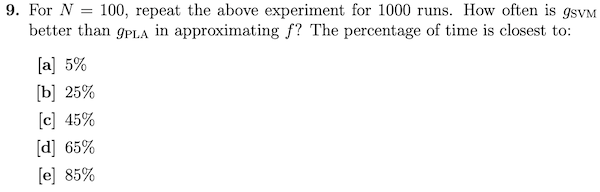

#### Answer:
D

In [39]:
N = 100
svm_outperforms = 0
for _ in range(RUNS):
    if SVM(N) > perceptron(N):
        svm_outperforms += 1
print(f"% SVM outperforms PLA: {svm_outperforms / RUNS * 100}%")

% SVM outperforms PLA: 71.6%


~ 65%

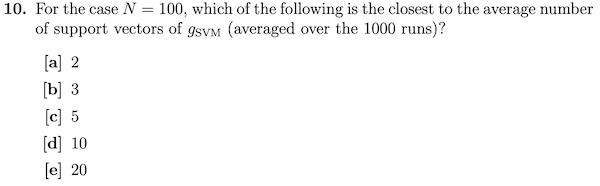

#### Answer:
B

In [40]:
def SVM(N):
    X, y, X_test, y_test = generate_data(N)
    clf = svm.SVC(kernel='linear', C=1000000000)
    clf.fit(X, y)
    return len(clf.support_vectors_)

svm_support_vectors = 0
for _ in range(RUNS):
    svm_support_vectors += SVM(N)
print(f"Average SVM Support Vectors: {svm_support_vectors / RUNS}")

Average SVM Support Vectors: 2.999


~ 3